# Ryan Nand - Term Project


In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans    # for k-means clustering

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_recall_fscore_support, accuracy_score


from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-white')

## Reading in Dataset

In [69]:
#https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('healthcare-dataset-stroke-data - with Zero.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
print (df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [71]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.756732,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,9.529497,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [72]:
#There are 201 missing values within the bmi column 
#To fix this I will just take the mean of the bmi and input them as such so the dataset will be complete 
#The string values have also been converted to numbers using 0,1,2 to represent their string, thus making plotting easier 
df = pd.read_csv('healthcare-dataset-stroke-data - with Zero.csv')


df.bmi = df.bmi.replace(0,df.bmi.mean())
df.age = df.age.replace(0,df.age.mean())
df.gender = df.gender.map({'Male':0, 'Female':1, 'Other':2})
df.ever_married = df.ever_married.map({'No':0, 'Yes':1})
df.work_type = df.work_type.map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3,'Never_worked':4})
df.Residence_type = df.Residence_type.map({'Urban':0, 'Rural':1})
df.smoking_status = df.smoking_status.map({'smokes':0, 'formerly smoked':1, 'never smoked':2, 'Unknown':3})





df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,1,1,202.21,27.756732,2,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.500000,2,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.400000,0,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.000000,2,1


In [73]:
#viewing the statistics of the dataset after value change
df.describe()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,43.226614,0.097456,0.054012,0.656164,0.837965,0.491977,106.147677,28.848533,1.820157,0.048728
std,21161.721625,0.492941,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.701188,1.029961,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,1.000000,0.000000
50%,36932.000000,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.885000,27.756732,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## Data visualization

There are 6 different graphs that reprsent people's health
* Gender distribution
* Heart diesease
* Hypertension
* Smoking
* Stroke
* Ages

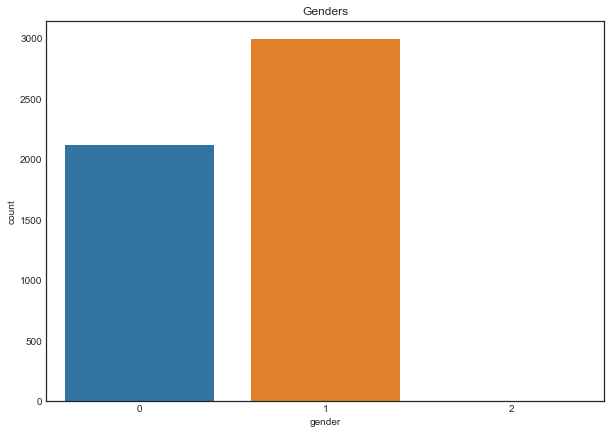

In [74]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Genders')
sns.countplot(data=df,x=df['gender'])
plt.show()

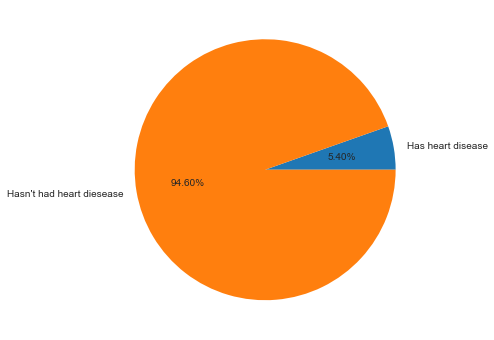

In [75]:
plt.figure(figsize=(6, 6))
classx = ['Has heart disease',"Hasn't had heart diesease"]
countx = [len(df[df.heart_disease == 1]),len(df[df.heart_disease == 0])]
plt.pie(countx, labels = classx,autopct='%1.2f%%')
plt.show()

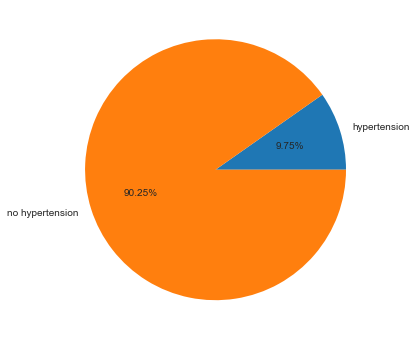

In [76]:
plt.figure(figsize=(6, 6))
classx = ['hypertension','no hypertension']
countx = [len(df[df.hypertension == 1]),len(df[df.hypertension == 0])]
plt.pie(countx, labels = classx,autopct='%1.2f%%')
plt.show()

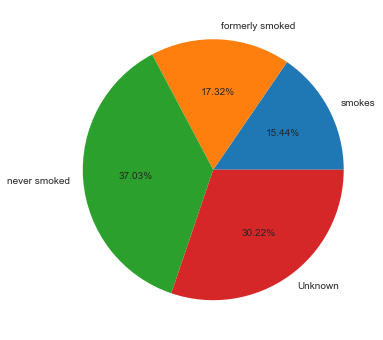

In [77]:
plt.figure(figsize=(6, 6))
classx = ['smokes', 'formerly smoked', 'never smoked', 'Unknown']
countx = [len(df[df.smoking_status == 0]),len(df[df.smoking_status == 1]),len(df[df.smoking_status == 2]),len(df[df.smoking_status == 3])]
plt.pie(countx, labels = classx,autopct='%1.2f%%')
plt.show()



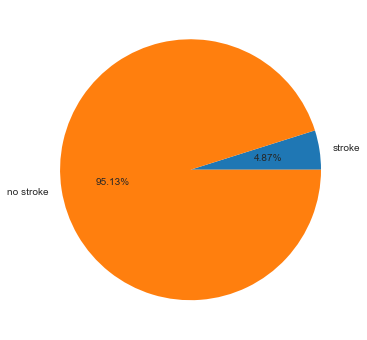

In [78]:
plt.figure(figsize=(6, 6))
classx = ['stroke','no stroke']
countx = [len(df[df.stroke == 1]),len(df[df.stroke == 0])]
plt.pie(countx, labels = classx,autopct='%1.2f%%')
plt.show()

E:\Anaconda\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


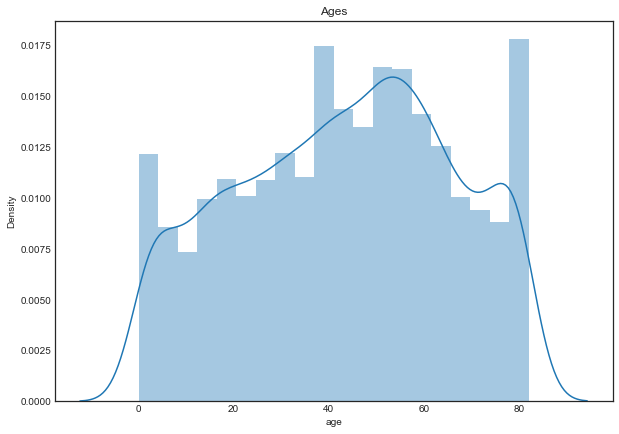

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(df['age'],hist='true')
plt.title('Ages')
plt.show()

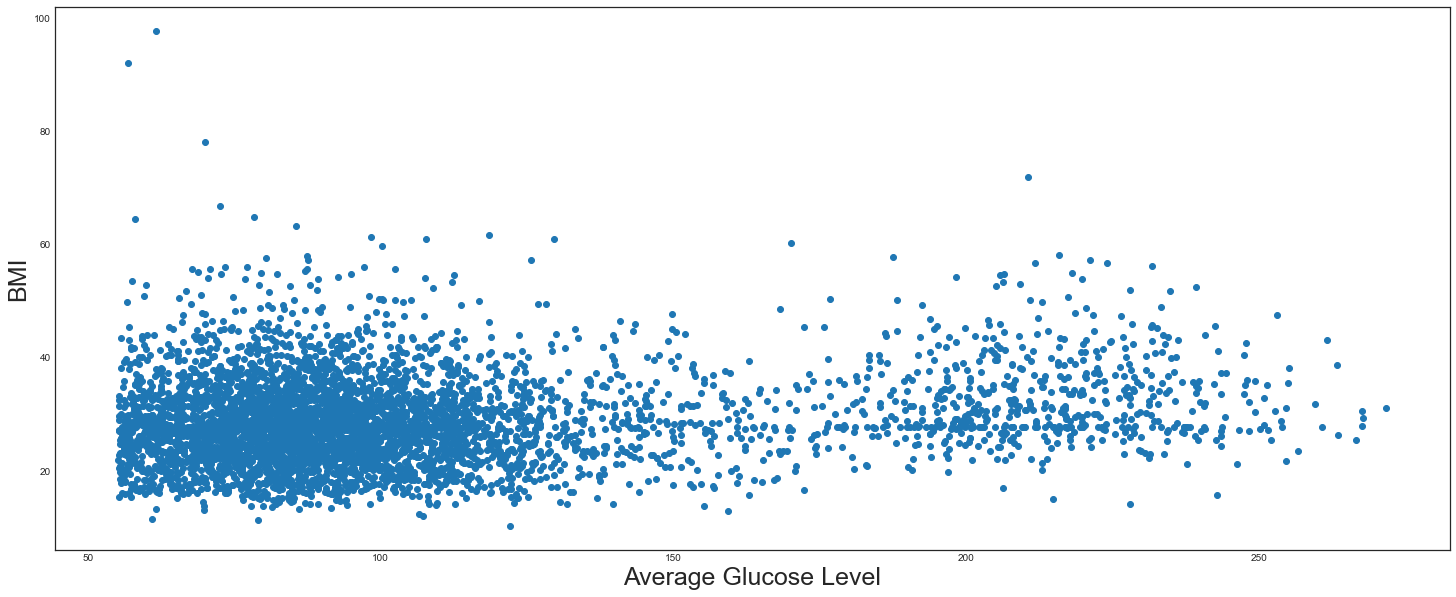

In [80]:
#So now we will plot the average glucose level against bmi 
plt.figure(figsize=(25,10))
plt.scatter(df['avg_glucose_level'], df['bmi'])
plt.xlabel("Average Glucose Level",fontsize=25)
plt.ylabel("BMI",fontsize=25)
plt.show()

# K-mean average glucose level, BMI and stroke

Here I will clustering using k-mean. There are 2 diagrams, one with stroke variable and one without. I have 3 variables used thus a 3d scatter plot will be used for the second diagram. The stroke variable is binary 0 = no stroke, 1 = stroke 

In [81]:
#define X and with the columns we are going to use
X = df[['avg_glucose_level', 'bmi', 'stroke']]
X.head()

,avg_glucose_level,bmi,stroke
0,228.69,36.600000,1
1,202.21,27.756732,1
2,105.92,32.500000,1
3,171.23,34.400000,1
4,174.12,24.000000,1


## 2D scatter plot (average glucose level and BMI)

Text(0, 0.5, 'BMI')

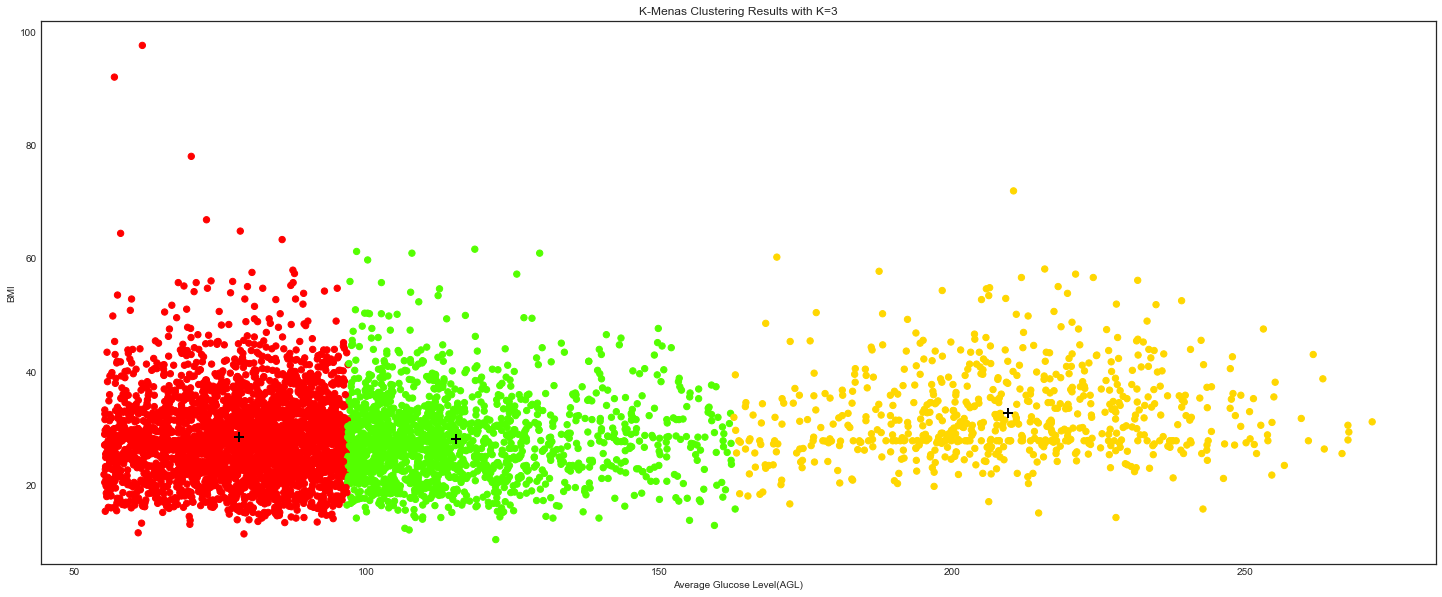

In [82]:
X = df[['avg_glucose_level', 'bmi']]

km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

fig, (ax2)= plt.subplots(figsize=(25,10))

ax2.scatter(df['avg_glucose_level'],df['bmi'],s=40,c=km2.labels_,cmap=plt.cm.prism)
ax2.set_title('K-Menas Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],marker='+',s=100,c='k',linewidth=2)
ax2.set_xlabel('Average Glucose Level(AGL)')
ax2.set_ylabel('BMI')

<div class="alert alert-block alert-info">
As we can see there are 3 groups. The data seems to show that even if you have a higher BMI that doesn't mean you have a higher average glucose levels. This is true since BMI is not an accurate representation of a person's health over all.
</div>

## 3D scatter plot  (average glucose level, BMI and Stroke )

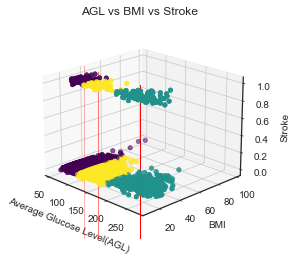

In [83]:
X = df[['avg_glucose_level', 'bmi', 'stroke']]
#Representing k means with 3 centriods 
kplot = plt.axes(projection='3d')
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)


kplot.scatter(df.avg_glucose_level, df.bmi, df.stroke, c=km2.labels_, cmap='viridis', linewidth=0.5)
kplot.scatter(df.avg_glucose_level, df.bmi, df.stroke, c=km2.labels_, cmap='viridis', linewidth=0.5)
# plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
kplot.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='_', s=1,color = 'red', linewidth=200)

#Setting labels
kplot.set_xlabel('Average Glucose Level(AGL)')
kplot.set_ylabel('BMI')
kplot.set_zlabel('Stroke')
kplot.set_title("AGL vs BMI vs Stroke")
# kplot.autoscale_on
kplot.view_init(20, -45)
plt.show()

#I could not figure out how to scale the figure, I am also not sure how to display centroid's properly in a 3D scatter plot so

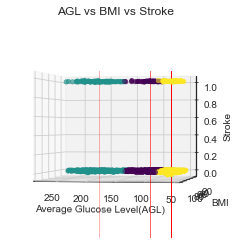

In [84]:
X = df[['avg_glucose_level', 'bmi', 'stroke']]
#Representing k means with 3 centriods 
kplot = plt.axes(projection='3d')
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)


kplot.scatter(df.avg_glucose_level, df.bmi, df.stroke, c=km2.labels_, cmap='viridis', linewidth=0.5)
kplot.scatter(df.avg_glucose_level, df.bmi, df.stroke, c=km2.labels_, cmap='viridis', linewidth=0.5)
# plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
kplot.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='_', s=1,color = 'red', linewidth=200)

#Setting labels
kplot.set_xlabel('Average Glucose Level(AGL)')
kplot.set_ylabel('BMI')
kplot.set_zlabel('Stroke')
kplot.set_title("AGL vs BMI vs Stroke")
# kplot.autoscale_on
kplot.view_init(0, 100)
plt.show()

#I could not figure out how to scale the figure, I am also not sure how to display centroid's properly in a 3D scatter plot

<div class="alert alert-block alert-info">
Another view of the same diagram, for a better view of the centroids
</div>


The above k-clusters represent clusters of people and their Average Glucose Level vs thier BMI and if they have had a stroke .
As you can see on there are 3 different groups of people;
* The first group have a distribution of BMIs but their AGL(~50 - ~70) is realatively low. This can contribute to the amount of strokes thus that group having the second most amount.
* The second group of people, they are the middle cataory, their AGLs(~70 - ~160) and BMI display they are the group with the least amount of strokes. 
* But the last group of people have a higher AGLs(~160 - ~260) and are the group with the most strokes.
    

<b>This data displays that although your BMI is higher doesn't mean you have a higher chance of a stroke. However your AGL can represent a chance of a stroke </b>


# Training data to predict strokes using AGL

Here will use neural networks and 50% of the data to train and determin stroke chance.

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data - with Zero.csv")
df.head()

In [86]:
df = pd.read_csv('healthcare-dataset-stroke-data - with Zero.csv')
#Taking the dataframe and then making sure there are no NaN in our dataset
X = df

X.bmi = df.bmi.replace(0,df.bmi.mean())
X.gender = df.gender.map({'Male':0, 'Female':1, 'Other':2})
X.ever_married = df.ever_married.map({'No':0, 'Yes':1})
X.work_type = df.work_type.map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3,'Never_worked':4})
X.Residence_type = df.Residence_type.map({'Urban':0, 'Rural':1})
X.smoking_status = df.smoking_status.map({'smokes':0, 'formerly smoked':1, 'never smoked':2, 'Unknown':3})

#We will drop ID since it is not needed and we drop stroke since that is what we want to predict
X = df.drop(['id', 'stroke','work_type','Residence_type','ever_married' ], axis=1)
y = df.stroke

#using 50% of the data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [87]:
#To check if we have any missing data
print (df.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [88]:
X.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,228.69,36.600000,1
1,1,61.0,0,0,202.21,27.756732,2
2,0,80.0,0,1,105.92,32.500000,2
3,1,49.0,0,0,171.23,34.400000,0
4,1,79.0,1,0,174.12,24.000000,2


In [89]:
nn = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100, activation='relu', random_state=1)
perc = Perceptron(penalty='l1', random_state=1, max_iter=100, shuffle=True)
logreg = LogisticRegression()
gb = GradientBoostingClassifier(random_state=1)

In [90]:
nn.fit(X_train, y_train)
perc.fit(X_train, y_train)
logreg.fit(X_train, y_train)
gb.fit(X_train, y_train)

E:\Anaconda\Anaconda\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\Anaconda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(random_state=1)

In [91]:
preds_nn = nn.predict(X_test)
preds_perc = perc.predict(X_test)
preds_logreg = logreg.predict(X_test)
preds_gb = gb.predict(X_test)

In [92]:
cm_nn = pd.DataFrame(confusion_matrix(y_test, preds_nn).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Neural Network:\n")
print(cm_nn)

tree_acc = accuracy_score(y_test, preds_nn)
print('\nAccuracy is: %s' % tree_acc)

Using Neural Network:

       No  Yes
No   2429  126
Yes     0    0

Accuracy is: 0.9506849315068493


In [93]:
cm_logreg = pd.DataFrame(confusion_matrix(y_test, preds_logreg).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_logreg)

tree_acc = accuracy_score(y_test, preds_logreg)
print('\nAccuracy is: %s' % tree_acc)

Using Logistic Regression:

       No  Yes
No   2429  125
Yes     0    1

Accuracy is: 0.9510763209393346


In [94]:
cm_gb = pd.DataFrame(confusion_matrix(y_test, preds_gb).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_gb)

tree_acc = accuracy_score(y_test, preds_gb)
print('\nAccuracy is: %s' % tree_acc)

Using Logistic Regression:

       No  Yes
No   2412  120
Yes    17    6

Accuracy is: 0.9463796477495108
